first moment =  0.18422030392512678
StdDEv =  0.520392231504629
Real time 0:00:00, CP time 0.370
 FCN=39.1308 FROM MIGRAD    STATUS=CONVERGED      14 CALLS          15 TOTAL
                     EDM=1.71185e-14    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.11579e+02   1.11798e+00   3.45814e-03  -1.65506e-07


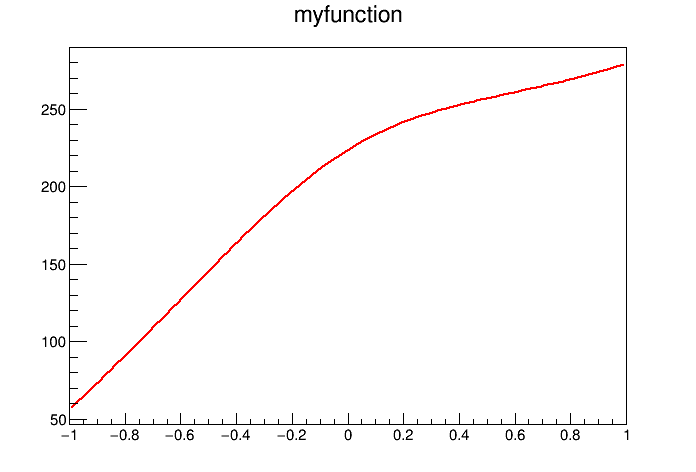

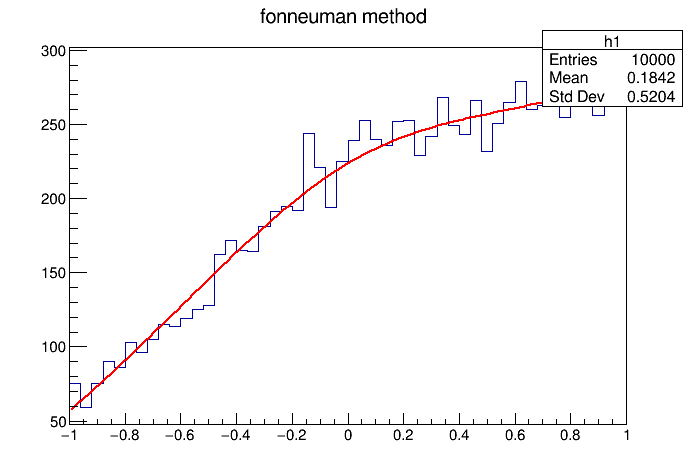

In [151]:

import sys, ROOT
from ROOT import gRandom, TCanvas, TFormula, TF1, TH1F, TStopwatch


a = -1
b = 1


def f(x, p): return ((1/(1+(x[0])**2))+1+x[0])*p[0]

c = ROOT.TCanvas()
ff = TF1("myfunction", f, a, b, 1)

ff.SetParameter(0, 1);
ff.Draw();
c.Draw();


def fonneumanMethod(a, b):
    fmax = ff(1)
    while True:
        mu = gRandom.Uniform(0, fmax)
        r = gRandom.Uniform(a, b)
        if mu<=ff(r): return r

       
#Histogram
stopwatch = ROOT.TStopwatch()


c1= ROOT.TCanvas()

h1 = TH1F("h1","fonneuman method",50,-1,1)
stopwatch.Start()
for i in range(0, 10000):
    h1.Fill(fonneumanMethod(a, b))
stopwatch.Stop
stopwatch.Print()

h1.Draw();
h1.Fit(ff);
c1.Draw();

print('first moment = ', h1.GetMean())
print('StdDEv = ', h1.GetStdDev())





# h1.Fit(ff);
# c1.Draw();

first moment =  0.17653076971820525
StdDEv =  0.5202893316267209
Real time 0:00:00, CP time 0.010
Real time 0:00:00, CP time 0.170
 FCN=52.2567 FROM MIGRAD    STATUS=CONVERGED      12 CALLS          13 TOTAL
                     EDM=6.08853e-22    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.11432e+02   1.11725e+00   3.98113e-03  -3.12336e-11


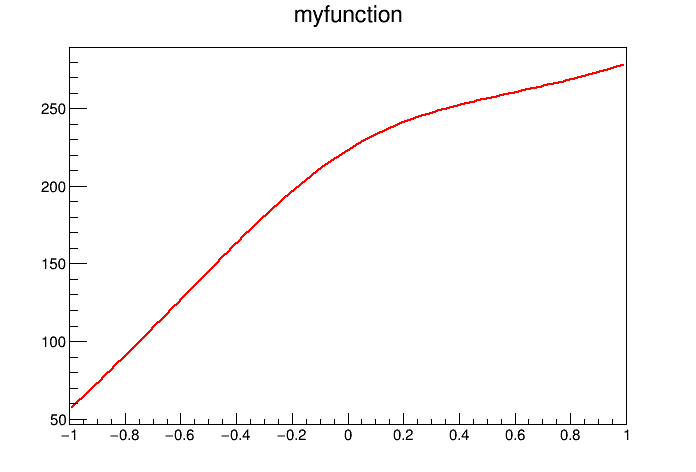

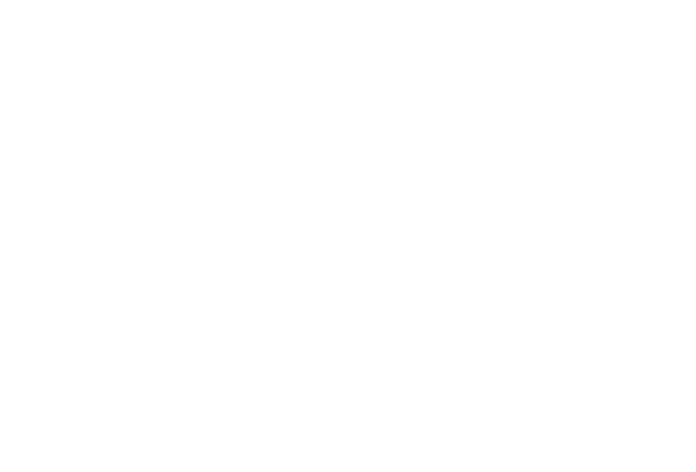

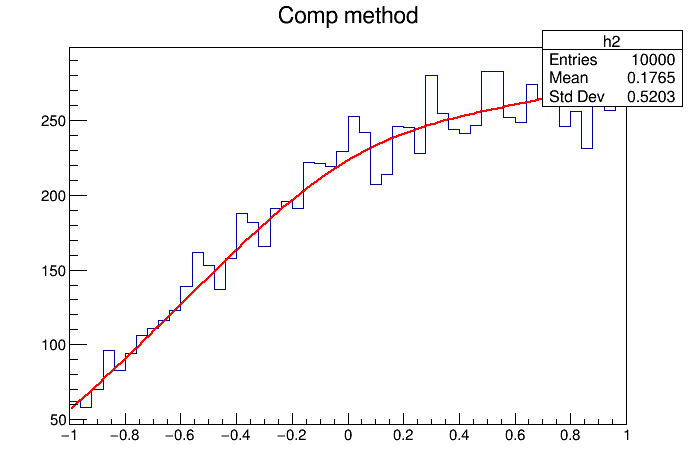

In [155]:
#Method2
#f(x)= a1*g1(x) + a2g2(x)
from math import tan, sqrt, atan

def g1(x):
    return (1/(1+(x)**2))
def g2(x):
    return (1 + x)



b1= atan(b)-atan(a)
b2= ((1/2)*b*b +b) - ((1/2)*a*a +a)

a1= (b1)/(b1+b2)
a2= (b2)/(b1+b2)

#a1+a2=1
gf1 = ROOT.TF1("function", g1, a, b, 1)
gf1.SetParameter(0, 1/b1)

gf2 = ROOT.TF1("function2", g2, a, b, 1)
gf2.SetParameter(0, 1/b2)

def F1(x,b1): 
    return (atan(x)-atan(a))/b1
def F2(x,b2): 
    return (((1/2)*x*x +x)-((1/2)*a*a +a))/b2

#REVERSE
def Y1(x,b1):
    return tan(x*b1 + atan(a))
def Y2(x,b2) :
    return -1 + (1+2*(x*b2 + ((1/2)*a*a + a)))**(1/2)



def Comp(a,b,a1,a2,b1,b2):
    
    while True:
           newr = gRandom.Uniform(0,1)
           newk = gRandom.Uniform(0,1)
           if   newk < a1 :
                v = Y1(newr,b1)
                return v
           elif newk>=a1 and newk<a1+a2 :
                v =Y2(newr,b2)
                return v
            
           
                   
#HISTOGRAM
c2= ROOT.TCanvas()                  
stopwatch = ROOT.TStopwatch()

h2 = TH1F("h2","Comp method",50,-1,1)

stopwatch.Start()

for i in range (0, 10000):
    hist = Comp(a,b,a1,a2,b1,b2)
    h2.Fill(hist)
    
stopwatch.Stop
stopwatch.Print()

h2.Draw()
h2.Fit(ff);
c2.Draw()          

print('first moment = ', h2.GetMean())
print('StdDEv = ', h2.GetStdDev())

